In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

rdkit.__version__

import pandas as pd
from rdkit.Chem import PandasTools
from psikit import Psikit
pk = Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [2]:
 from rdkit.Chem import AllChem as Chem

# of SMILES: 10


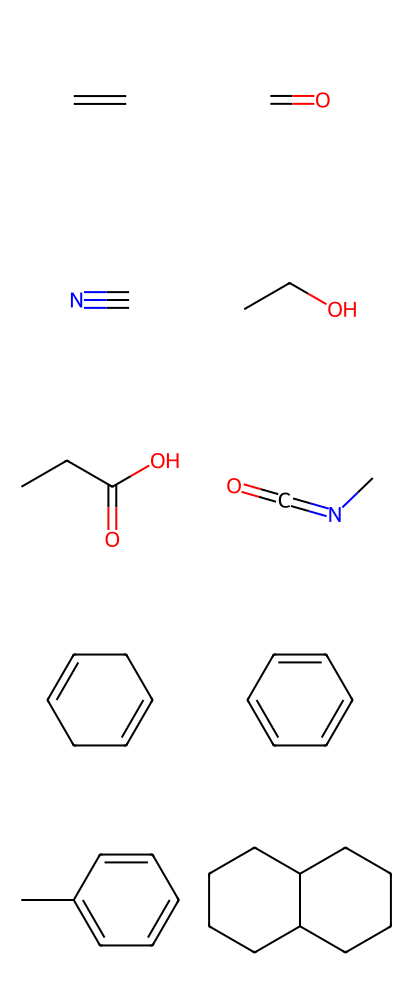

In [3]:
file_name = 'smiles.csv'

with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles)-1)

mols = [Chem.MolFromSmiles(smi) for smi in smiles[1:]]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [4]:
url = 'https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv'

esol_data = pd.read_csv(url)
esol_data.head(1)

,smiles,logSolubility
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77


In [5]:
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')
esol_data.head(1)

,smiles,logSolubility,ROMol
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,<rdkit.Chem.rdchem.Mol object at 0x15206cced510>


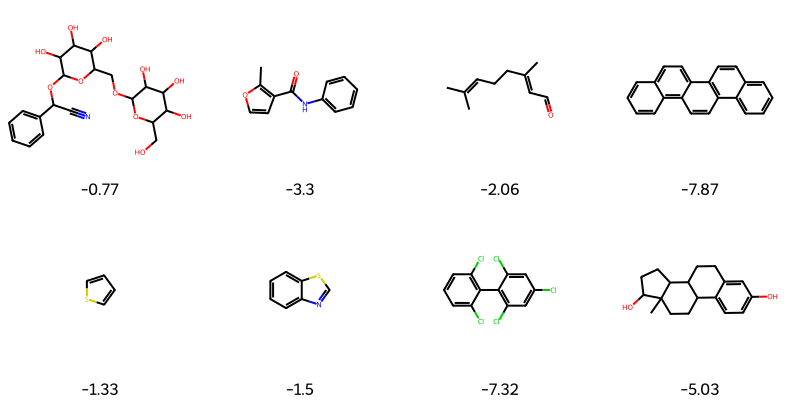

In [6]:
PandasTools.FrameToGridImage(esol_data.head(8), legendsCol="logSolubility", molsPerRow=4)

In [7]:
esol_data["n_Atoms"] = esol_data['ROMol'].map(lambda x: x.GetNumAtoms())
esol_data.head(1)

,smiles,logSolubility,ROMol,n_Atoms
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,<rdkit.Chem.rdchem.Mol object at 0x15206cced510>,32


In [8]:
df = pd.DataFrame(esol_data)

# Save DataFrame to a CSV file
df.to_csv('esol_data.csv', index=False)

In [10]:
data=pd.read_csv('smiles.csv')
optimized_energies = []

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    smiles = row['smiles']

    # Load the molecule using its SMILES representation
    pk.read_from_smiles(smiles)
    
    # Compute the optimized energy
    %time energy = pk.optimize()

    # Append the optimized energy to the list
    optimized_energies.append(energy)

# Add the optimized energies to the DataFrame
data['optimized_energy'] = optimized_energies

Optimizer: Optimization complete!
CPU times: user 1.51 s, sys: 76.9 ms, total: 1.59 s
Wall time: 3.38 s
Optimizer: Optimization complete!
CPU times: user 1.25 s, sys: 37.6 ms, total: 1.29 s
Wall time: 1.33 s
Optimizer: Optimization complete!
CPU times: user 1.02 s, sys: 31.6 ms, total: 1.05 s
Wall time: 1.06 s
Optimizer: Optimization complete!
CPU times: user 4.22 s, sys: 108 ms, total: 4.33 s
Wall time: 4.4 s
Optimizer: Optimization complete!
CPU times: user 18 s, sys: 1.04 s, total: 19.1 s
Wall time: 19.2 s
Optimizer: Optimization complete!
CPU times: user 6.21 s, sys: 140 ms, total: 6.35 s
Wall time: 6.38 s
Optimizer: Optimization complete!
CPU times: user 19.4 s, sys: 1.33 s, total: 20.7 s
Wall time: 20.8 s
Optimizer: Optimization complete!
CPU times: user 5.87 s, sys: 394 ms, total: 6.26 s
Wall time: 6.29 s
Optimizer: Optimization complete!
CPU times: user 13.6 s, sys: 926 ms, total: 14.5 s
Wall time: 14.6 s
Optimizer: Optimization complete!
CPU times: user 54 s, sys: 5.3 s, total

In [11]:
data

,smiles,optimized_energy
0,C=C,-78.038769
1,C=O,-113.869536
2,C#N,-92.876942
3,CCO,-154.089919
4,CCC(=O)O,-266.858985
5,CN=C=O,-206.795542
6,C1=CCC=CC1,-231.846762
7,C1=CC=CC=C1,-230.713524
8,C1=C(C)C=CC=C1,-269.753552
9,C1CCC2CCCCC2C1,-389.204842
